In [46]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library. 
# Run from terminal: - conda install -c conda-forge requests
import requests
#requests.__version__

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [47]:
# Generate latitudes and longitudes
# stored to access later
# creating arrays of latitudes and longitudes
# generate the random latitudes, create similar code snippet generate longitudes.
# Ensure enough latitudes and longitudes, start with 1,500.
# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [48]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [49]:
# You can only unzip a zipped tuple once before it is removed from the computer’s memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
# DON'T do this :) - list(lat_lngs)

In [50]:
# Use the coordinates in our lat_lngs tuple to find the nearest city using Python’s citipy module.

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [51]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bbe0b849fe50cdbed011ec1a0b8a5b3


In [52]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | protvino
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | maneromango
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | mpika
Processing Record 7 of Set 1 | sioux lookout
Processing Record 8 of Set 1 | kalmunai
Processing Record 9 of Set 1 | fortuna
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | barrow
Pr

Processing Record 40 of Set 4 | windhoek
Processing Record 41 of Set 4 | skjervoy
Processing Record 42 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 43 of Set 4 | broome
Processing Record 44 of Set 4 | lokosovo
Processing Record 45 of Set 4 | ternate
Processing Record 46 of Set 4 | chicama
Processing Record 47 of Set 4 | auki
Processing Record 48 of Set 4 | yellowknife
Processing Record 49 of Set 4 | palmer
Processing Record 50 of Set 4 | turukhansk
Processing Record 1 of Set 5 | bagamoyo
Processing Record 2 of Set 5 | tabou
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | toliary
City not found. Skipping...
Processing Record 5 of Set 5 | warrington
Processing Record 6 of Set 5 | cacaopera
Processing Record 7 of Set 5 | straumen
Processing Record 8 of Set 5 | vacaria
Processing Record 9 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 5 | shrewsbury
Processing Record 11 of Set 5 | abiy adi
City not found. Skippi

Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | singaraja
Processing Record 33 of Set 8 | loding
Processing Record 34 of Set 8 | aksu
Processing Record 35 of Set 8 | sibolga
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | torbay
Processing Record 38 of Set 8 | sampit
Processing Record 39 of Set 8 | niquero
Processing Record 40 of Set 8 | phibun mangsahan
Processing Record 41 of Set 8 | alugan
Processing Record 42 of Set 8 | tynda
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | ahipara
Processing Record 45 of Set 8 | pahrump
Processing Record 46 of Set 8 | hoquiam
Processing Record 47 of Set 8 | newport
Processing Record 48 of Set 8 | port blair
Processing Record 49 of Set 8 | roma
Processing Record 50 of Set 8 | bilma
Processing Record 1 of Set 9 | bonavista
Processing Record 2 of Set 9 | concepcion del uruguay
Processing Record 3 of Set 9 | gonaives
Processing Record 4 of Set 9 | margate
Processing Record 5 of Set 9

Processing Record 18 of Set 12 | senaki
Processing Record 19 of Set 12 | aitape
Processing Record 20 of Set 12 | mitsamiouli
Processing Record 21 of Set 12 | khandbari
Processing Record 22 of Set 12 | saint george
Processing Record 23 of Set 12 | tramandai
Processing Record 24 of Set 12 | ojinaga
Processing Record 25 of Set 12 | oksfjord
Processing Record 26 of Set 12 | coihaique
Processing Record 27 of Set 12 | tuatapere
Processing Record 28 of Set 12 | bababe
City not found. Skipping...
Processing Record 29 of Set 12 | san luis
Processing Record 30 of Set 12 | ampanihy
Processing Record 31 of Set 12 | yazman
Processing Record 32 of Set 12 | aykhal
Processing Record 33 of Set 12 | ramhormoz
Processing Record 34 of Set 12 | nang rong
Processing Record 35 of Set 12 | los llanos de aridane
Processing Record 36 of Set 12 | aguimes
Processing Record 37 of Set 12 | dzilam gonzalez
Processing Record 38 of Set 12 | anapskaya
Processing Record 39 of Set 12 | dentsville
Processing Record 40 of 

In [54]:
city_data

[{'City': 'Protvino',
  'Lat': 54.87,
  'Lng': 37.22,
  'Max Temp': 73.4,
  'Humidity': 73,
  'Cloudiness': 36,
  'Wind Speed': 4.47,
  'Country': 'RU',
  'Date': '2020-06-28 05:50:23'},
 {'City': 'Maneromango',
  'Lat': -7.2,
  'Lng': 38.78,
  'Max Temp': 75.2,
  'Humidity': 88,
  'Cloudiness': 75,
  'Wind Speed': 4.7,
  'Country': 'TZ',
  'Date': '2020-06-28 05:50:24'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 35.6,
  'Humidity': 59,
  'Cloudiness': 20,
  'Wind Speed': 19.46,
  'Country': 'AR',
  'Date': '2020-06-28 05:50:24'},
 {'City': 'Puerto Ayora',
  'Lat': -0.74,
  'Lng': -90.35,
  'Max Temp': 70,
  'Humidity': 91,
  'Cloudiness': 52,
  'Wind Speed': 1.01,
  'Country': 'EC',
  'Date': '2020-06-28 05:50:24'},
 {'City': 'Mpika',
  'Lat': -11.83,
  'Lng': 31.45,
  'Max Temp': 64.45,
  'Humidity': 59,
  'Cloudiness': 3,
  'Wind Speed': 5.39,
  'Country': 'ZM',
  'Date': '2020-06-28 05:50:24'},
 {'City': 'Sioux Lookout',
  'Lat': 50.1,
  'Lng': -91.92,
  'M

In [55]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Protvino,54.87,37.22,73.40,73,36,4.47,RU,2020-06-28 05:50:23
1,Maneromango,-7.20,38.78,75.20,88,75,4.70,TZ,2020-06-28 05:50:24
2,Ushuaia,-54.80,-68.30,35.60,59,20,19.46,AR,2020-06-28 05:50:24
3,Puerto Ayora,-0.74,-90.35,70.00,91,52,1.01,EC,2020-06-28 05:50:24
4,Mpika,-11.83,31.45,64.45,59,3,5.39,ZM,2020-06-28 05:50:24
5,Sioux Lookout,50.10,-91.92,64.40,82,20,3.36,CA,2020-06-28 05:45:38
6,Kalmunai,7.42,81.82,88.65,59,46,4.32,LK,2020-06-28 05:50:25
7,Fortuna,40.60,-124.16,55.00,87,90,9.17,US,2020-06-28 05:50:25
8,Cherskiy,68.75,161.30,47.05,55,36,18.23,RU,2020-06-28 05:50:25
9,Bambous Virieux,-20.34,57.76,77.00,73,40,11.41,MU,2020-06-28 05:50:25


In [40]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [56]:
city_data_df = city_data_df[new_column_order]

In [57]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Protvino,RU,2020-06-28 05:50:23,54.87,37.22,73.40,73,36,4.47
1,Maneromango,TZ,2020-06-28 05:50:24,-7.20,38.78,75.20,88,75,4.70
2,Ushuaia,AR,2020-06-28 05:50:24,-54.80,-68.30,35.60,59,20,19.46
3,Puerto Ayora,EC,2020-06-28 05:50:24,-0.74,-90.35,70.00,91,52,1.01
4,Mpika,ZM,2020-06-28 05:50:24,-11.83,31.45,64.45,59,3,5.39
...,...,...,...,...,...,...,...,...,...
575,Anzio,IT,2020-06-28 05:50:00,41.49,12.62,78.01,57,45,1.99
576,Bialogard,PL,2020-06-28 05:51:20,54.01,15.99,73.00,80,45,5.39
577,Vanimo,PG,2020-06-28 05:51:20,-2.67,141.30,85.68,66,100,7.70
578,Liberal,US,2020-06-28 05:50:00,37.04,-100.92,80.60,51,1,19.46


In [58]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Create scatter plots for:
# - latitude vs. maximum temperature, humidity, cloudiness, and wind speed. 

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [60]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593352029.8816068

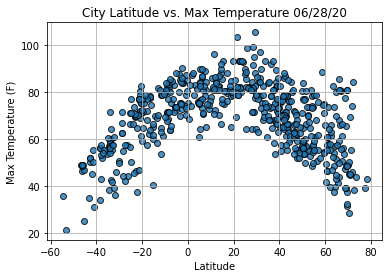

In [61]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

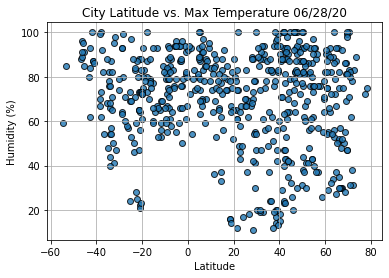

In [62]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

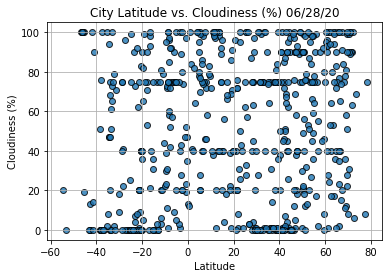

In [63]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

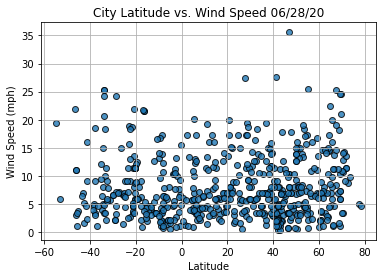

In [64]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()